In [1]:
import numpy as np
import sys
from matplotlib import pylab as plt
%matplotlib inline

In [2]:
sys.path.append("..")
import fastcat as fc
pz = fc.photoz.PhotoZHist('./pzdist.txt')

Reading file...
Creating pickled version of Franzona file!
done...


/home/anze/work/LSST/fastcat/fastcat/photoz_Hist.py:58: RuntimeWarning: invalid value encountered in divide
  self.dataset[:, 3:] = (np.where(integrals!=0., self.dataset[:, 3:].T/integrals, 0.)).T


First test sampling on well defined pdf

In [3]:
arr = np.array([0, 1, 0, 107])
arr.dtype=[('z','<f8'), ('iz','<i8'), ('itype','<i8'), ('imag','<i8')]
indice = pz.tup2id(1,0,107) #indice=470

In [4]:
arr=np.array(ztrues,dtype=[('z',np.float32)])
arr = pz.applyPhotoZ(arr)

NameError: name 'ztrues' is not defined

NameError: name 'smp' is not defined

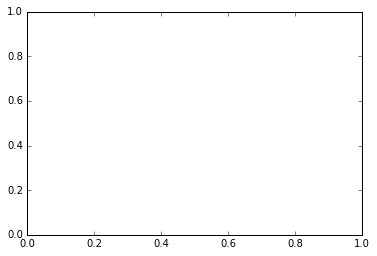

In [5]:
ax=plt.subplot(111)
dummy = ax.hist(smp,100, normed=True);
#grrr where does factor 3 comes from...
ax.plot(pz.dz, pz.dataset[indice,3:]*3/np.diff(dummy[1])[0])
ax.set_title(pz.dataset[indice,:3])
ax.set_xlabel('dz')
ax.set_xlim(-0.1,3);

Now let's try with vectors of input

In [6]:
#ztrues=np.array([0.7, 0.1])
ntot=100
ztrues = 1.+np.random.rand(ntot)*1.9

In [7]:
arr=np.array(ztrues,dtype=[('z',np.float32)])
arr = pz.applyPhotoZ(arr)

(28, 901)


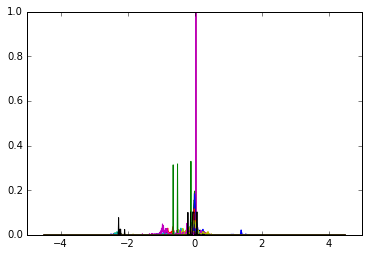

In [8]:
nsamples=1000
photoz=[]
indices = pz.tup2id(arr['iz'], arr['itype'], arr['imag'])
photoz_pdfs = pz.getpdf(arr)
mask=photoz_pdfs.sum(axis=1)!=0
masked_pdfs=photoz_pdfs[mask]
print masked_pdfs.shape
[plt.plot(pz.dz,pdf) for pdf in masked_pdfs];
cumsum = np.cumsum(masked_pdfs, axis=1)
#print photoz_pdfs
#print mask

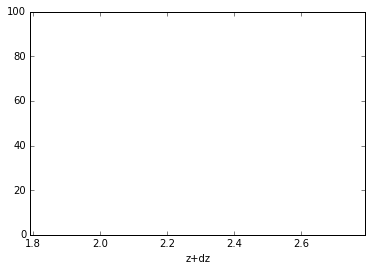

In [9]:
nsamples=1000

pz_samples = pz.drawPhotoZ(arr, nsamples)    
ax2=plt.subplot(111)
i=80
zt=arr[i]['z']
pdf = pz.getpdf(arr[i])
smp = pz_samples[i]
dummy = ax2.hist(smp,100, normed=True);
ax2.plot(pz.dz+zt, pdf/np.diff(dummy[1])[0])
ax2.set_xlabel('z+dz')
ax2.set_xlim(zt-0.5,zt+0.5);


And finally a PofZ and cPofZ quick test

In [10]:
a=pz.PofZ(arr, 0.6, 1)
b=pz.cPofZ(arr, 1.5)
print a, b

[  6.43973162e-02   2.59129524e-02   0.00000000e+00   1.31006314e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.19529639e-02
   1.05863075e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.78589765e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.09505779e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.93843641e-02   0.00000000e+00   8.65755724e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.34928406e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   7.57005753e-02   0.00000000e+00   5.87761478e-02
   0.00000000e+00   7.62478145e-02   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.10649416e-01   0.00000000e+00   0.00000000e+00
   1.46150551e-02   0.00000000e+00